In [5]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import lime
import lime.lime_tabular
from xgboost import XGBClassifier

In [6]:
data =  load_breast_cancer()

In [10]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
df = pd.DataFrame(data=  data.data , columns= data.feature_names)
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [16]:
X = df[df.columns.difference(['target'])]
y = df['target'].to_frame()#convert to dataframe
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#build the model
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)


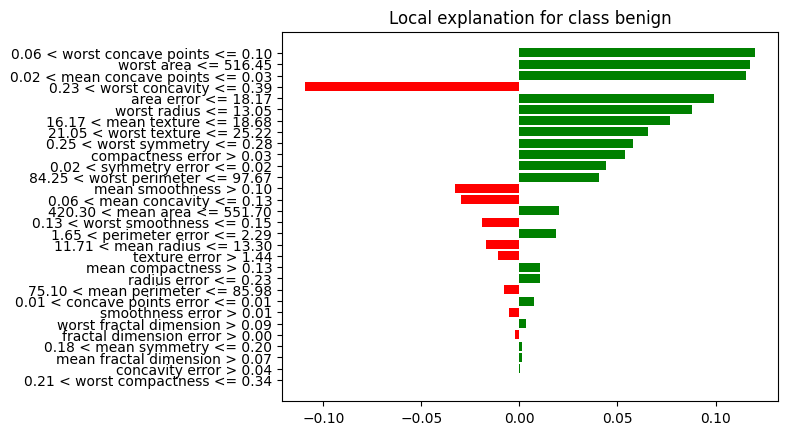

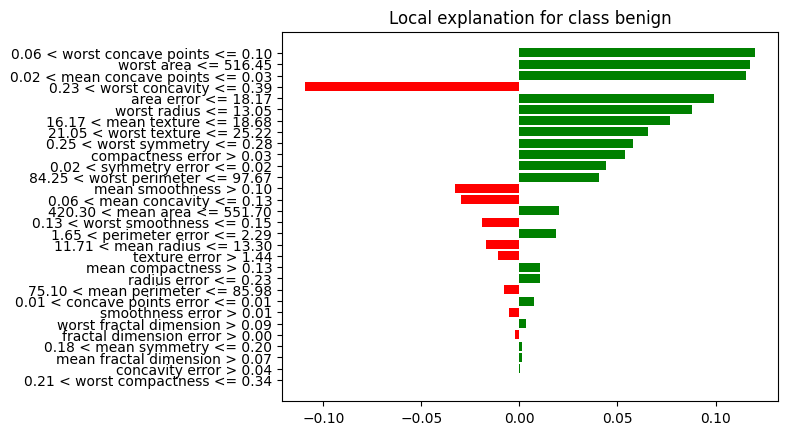

In [18]:
#Classifier function
classifier_function = lambda x:model.predict_proba(x).astype('float32')

#explainer
explainer  = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train.values,
    mode='classification',
    feature_names=x_train.columns,
    class_names=['malignant', 'benign'],
)

#to explain an instance
exp = explainer.explain_instance(x_test.values[3] , classifier_function , num_features=x_test.shape[1])

exp.show_in_notebook(show_all = False)

exp.as_pyplot_figure()


In [19]:
#shap

import shap

[00:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


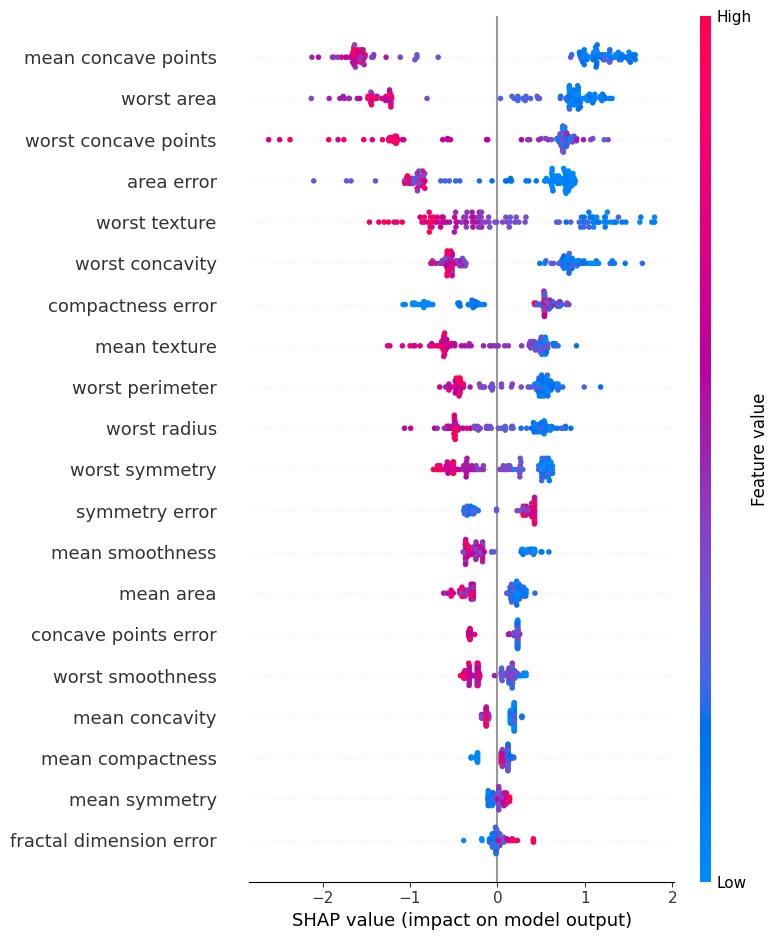

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [20]:
#Shap Explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(x_test)
expected_value = explainer.expected_value

shap.summary_plot(shap_values , x_test , feature_names=x_test.columns)

shap.summary_plot(shap_values[1] , x_test , feature_names=x_test.columns , plot_type='bar')